<a href="https://colab.research.google.com/github/ImperatorMarsa/paper_boat_detection/blob/master/paper_boat_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

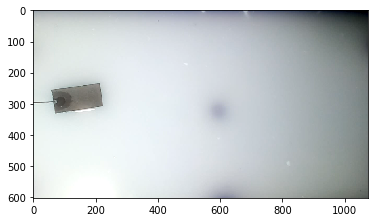

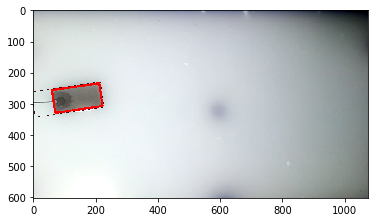

In [183]:
#%matplotlib inline
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
import sys
import numpy as np
import cv2
from random import random as rnd

#cv2.__version__ # v3.4.3
# figure(num=None, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='k')

img = cv2.imread('pic1.png')
img_size = tuple(img.shape[1::-1])

# scale_top = .1
# scale_bottom = .1
# array = np.array([
#     [0, round(img_size[1]*scale_top)],
#     [img_size[0], round(img_size[1]*scale_top)],
#     [img_size[0], round(img_size[1]-img_size[1]*scale_bottom)],
#     [0, round(img_size[1]-img_size[1]*scale_bottom)],
# ])
# crop_img = img[round(img_size[1]*scale_top):round(img_size[1]-img_size[1]*scale_bottom), 0:img_size[0]]

# hsv = cv2.cvtColor(crop_img, cv2.COLOR_BGR2HSV ) # меняем цветовую модель с BGR на HSV
# hsv_min = np.array((0, 0, 100), np.uint8)
# hsv_max = np.array((0, 0, 200), np.uint8)
# thresh = cv2.inRange(hsv, hsv_min, hsv_max ) # применяем цветовой фильтр

blur1 = cv2.GaussianBlur(img, (5, 5), 0)

edge = cv2.Canny(blur1,100,200) # применяем цветовой фильтр

blur2 = cv2.GaussianBlur(edge, (5, 5), 0)

_, contours0, hierarchy = cv2.findContours(blur2.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

crop_img2 = img.copy()

pony = []
# перебираем все найденные контуры в цикле
for cnt in contours0:
    rect = cv2.minAreaRect(cnt) # пытаемся вписать прямоугольник
    box = cv2.boxPoints(rect) # поиск четырех вершин прямоугольника
    box = np.int0(box) # округление координат
    pony.append(box)
    cv2.drawContours(crop_img2, [box], 0, (100*rnd(), 100*rnd(), 100*rnd()), 1) # рисуем прямоугольник

square = []

for x in pony:
  l1 = np.sqrt((x[0][0] - x[1][0])**2 + (x[0][1] - x[1][1])**2)
  l2 = np.sqrt((x[1][1] - x[2][1])**2 + (x[1][1] - x[2][1])**2)
  a1 = max([l1, l2])
  a2 = min([l1, l2])
  # print(a1 / a2, a1, a2)
  if a2 > 0 and a1 / a2 > 2:
    square = x

plt.imshow(img)
plt.show() # вывод обработанного кадра в окно

# plt.imshow(crop_img)
# plt.show() # вывод обработанного кадра в окно
    
# plt.imshow(thresh)
# plt.show() # вывод обработанного кадра в окно

# plt.imshow(blur1)
# plt.show() # вывод обработанного кадра в окно

# plt.imshow(blur2)
# plt.show() # вывод обработанного кадра в окно

# plt.imshow(crop_img2)
# plt.show() # вывод обработанного кадра в окно

if len(square) > 0:
  cv2.drawContours(crop_img2, [square], 0, (255, 0, 0,), 5) # рисуем прямоугольник
  plt.imshow(crop_img2)
  plt.show() # вывод обработанного кадра в окно